In [1]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

project_folder = "/content/drive/MyDrive/Number_Estimation/numerosity-estimation-master-data/"

Mounted at /content/drive


In [7]:
#############################
# Import: Create-Dataset-Utils: Class: SquareDataSet. Functions: Create_N_Sqaures, Create_N_Sqaures
#############################

file_name = "src/create_dataset.py"
PATH = project_folder + file_name
%run -i $PATH
!python $PATH

import pandas as pd


<Figure size 432x288 with 0 Axes>

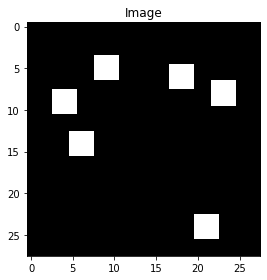

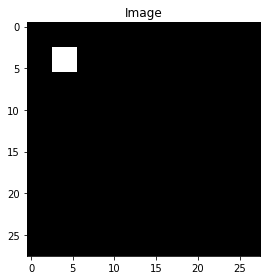

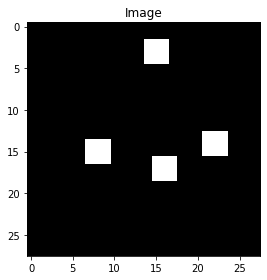

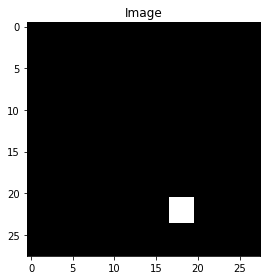

In [5]:

###########################
## Create equal-size square data-set
####################################

data_folder_path = '/content/drive/MyDrive/Number_Estimation/numerosity-estimation-master-data/data/equal_square_size/'

# create dataset ad dump it in pickle file 
tot_imgs = 6
data_set_test = Create_N_Images(tot_imgs, only_one_number=False, n_squares=1, fixed_area=True, area_=3)   
data_set_test.show_images(4, hull=False)


# create and save dataframe
# y = data_set_test.n_obj
# hull = data_set_test.hull.flatten()
# area_tot = data_set_test.total_areas.flatten()
# imgs = data_set_test.img_flatten
# index = range(tot_imgs)
# data = {'num':y, 'area': area_tot, 'hull': hull, 'index': index} 
#df = pd.DataFrame(data=data)
#PATH = data_folder_path + 'data_equal_square_size_60000.csv'
#df.to_csv (PATH, index = None, header=True)
# save flattened images
#imgs = data_set_test.img_flatten
#PATH = data_folder_path + 'data_equal_square_size_60000.npy'
#np.save(PATH, imgs) 

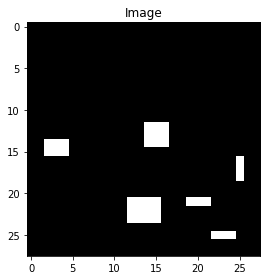

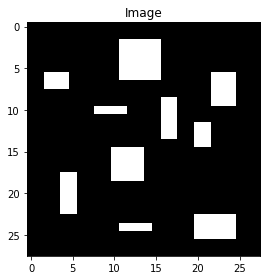

In [18]:

###########################
## Create RECTANGLE data-set
####################################

data_folder_path = '/content/drive/MyDrive/Number_Estimation/numerosity-estimation-master-data/data/rectangle/'

# create dataset ad dump it in pickle file 
tot_imgs = 60000
data_set_test = Create_N_Images(tot_imgs, only_one_number=False, n_squares=1, fixed_area=False, area_=3, rectangle=True)   
data_set_test.show_images([3,8], hull=False)


# create and save dataframe
y = data_set_test.n_obj
hull = data_set_test.hull.flatten()
area_tot = data_set_test.total_areas.flatten()
imgs = data_set_test.img_flatten
index = range(tot_imgs)
data = {'num':y, 'area': area_tot, 'hull': hull, 'index': index} 
df = pd.DataFrame(data=data)
PATH = data_folder_path + 'data_rectangle_60000.csv'
df.to_csv (PATH, index = None, header=True)
# save flattened images
imgs = data_set_test.img_flatten
PATH = data_folder_path + 'data_rectangle_60000.npy'
np.save(PATH, imgs) 

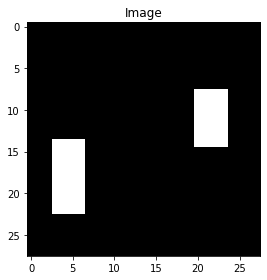

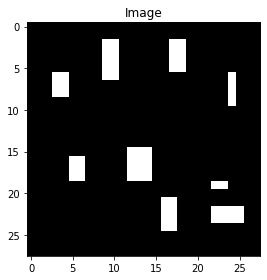

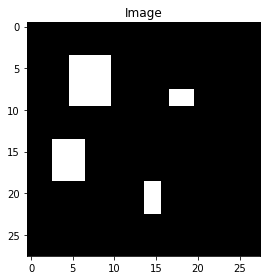

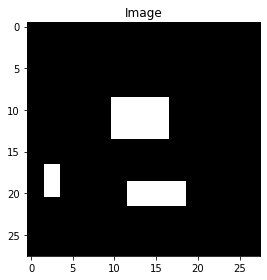

In [10]:
###########################
## Create RECTANGLE data-set with FIXED TOTAL AREA
####################################

data_folder_path = '/content/drive/MyDrive/Number_Estimation/numerosity-estimation-master-data/data/rectangle/'

# create dataset ad dump it in pickle file 
tot_imgs = 6
data_set_test = Create_N_Images(tot_imgs, only_one_number=False, n_squares=1, fixed_area=False, area_=3, rectangle=True, fixed_total_area=64)   
data_set_test.show_images(4, hull=False)

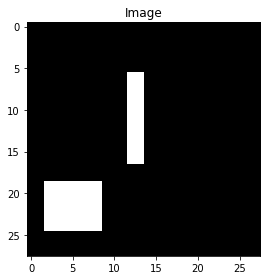

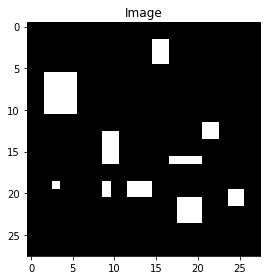

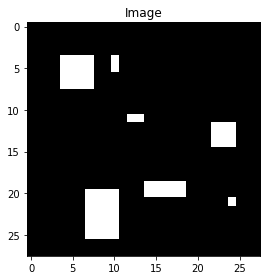

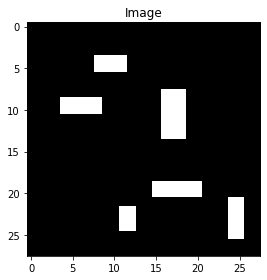

In [11]:

###########################
## Create RECTANGLE data-set with FIXED TOTAL AREA
####################################

data_folder_path = '/content/drive/MyDrive/Number_Estimation/numerosity-estimation-master-data/data/rectangle/'

# create dataset ad dump it in pickle file 
tot_imgs = 60000
data_set_test = Create_N_Images(tot_imgs, only_one_number=False, n_squares=1, fixed_area=False, area_=3, rectangle=True, fixed_total_area=64)   
data_set_test.show_images(4, hull=False)


# create and save dataframe
y = data_set_test.n_obj
hull = data_set_test.hull.flatten()
area_tot = data_set_test.total_areas.flatten()
imgs = data_set_test.img_flatten
index = range(tot_imgs)
data = {'num':y, 'area': area_tot, 'hull': hull, 'index': index} 
df = pd.DataFrame(data=data)
PATH = data_folder_path + 'data_rectangle_fixed_total_area_60000.csv'
df.to_csv (PATH, index = None, header=True)
# save flattened images
imgs = data_set_test.img_flatten
PATH = data_folder_path + 'data_rectangle_fixed_total_area_60000.npy'
np.save(PATH, imgs) 

In [ ]:
####################
## 1) Create data set 
##################################
# --> will return an instance of the class SquareDataSet()
# 1st argument corresponds to number of pictures/samples
# only_one_number should be set true if you want all the samples to consist only pictures with n_squares squares. Fixed area should be set true if all the pictures have only squares with same side length = area_
data_set = Create_N_Images(300, only_one_number=False, n_squares=5, fixed_area=False, area_=2)   # n_squares will only be considered if only_one_number==True,  area_ only if fixed_area==True

data_set.show_images([3,8], hull=False)

In [ ]:
def Create_N_Sqaures(n_objects, fixed_area=False, area_=1, rectangle=False):

    
    min_side_length = 1
    max_side_length = 5
    
    data = np.zeros((img_size, img_size), dtype=np.uint8)                                          
    total_area = 0
    max_objects = max_objects_


    for n in range(n_objects):
      
        new_attempt_all_squares = True
        
        while(new_attempt_all_squares==True):
            breaky = 0
            max_put_try = 4000    #Number of attempts to place square correctly: without overlap, within the borders of the image.
            put_try=0
            
            side_length =  [random.randint(min_side_length,max_side_length) for i in range(2)]
            if(fixed_area):
                side_length = [area_, area_]
            

            # Now try to put square correctly into image for max_put_try attempts.
            # Strategy: choose random x and y to set left-lowest corner of square and check whethter it intersects with existing squares
            while (breaky == 0):
              
                dist_around_squ = 2
                dist_to_squ = dist_around_squ
                
                rand_pixel_1 = random.randint(dist_around_squ,img_size-side_length[0]-dist_around_squ)
                rand_pixel_2 = random.randint(dist_around_squ, img_size-side_length[1]-dist_around_squ)

                
                # Check if object does not intersect with other
                breaky = 1
                for i in range(-dist_to_squ, side_length[0] + dist_to_squ):
                    for j in range(-dist_to_squ, side_length[1] + dist_to_squ):
                          if(data[rand_pixel_1 + i, rand_pixel_2 + j] == 255):
                              breaky=0

                put_try += 1
                
                # If tried max_put_try/20 time with the current size create new size of square (gets chance to be smaller and fit now)
                if(put_try%(max_put_try/20)==0 ): 
                    side_length =  [random.randint(min_side_length,max_side_length) for i in range(2)]
                    if(fixed_area):
                        side_length = [area_, area_]
                
                if(put_try >= max_put_try):
                    breaky = 1
                    print("ATTENTION: OBJECTS COULD NOT FIT INTO WINDOW. CHOOSE DIFFERENT SIZE FOR WINDOW OR OBJECTS")
                    #exit()
                    new_attempt_all_squares = True
                else:
                    new_attempt_all_squares = False
                
        data[rand_pixel_1,rand_pixel_2] = 255

        for i in range(side_length[0]):
            for j in range(side_length[1] ):
                data[rand_pixel_1 + i, rand_pixel_2 + j] = 255

        square_area = side_length[0]*side_length[1]
        total_area +=square_area
    

    # Data 2D-image --> 1D-array ( for NN as Input )
    data_flatten = data.flatten()
    # Build one-hot array from number of objects
    n_obj_one_hot = np.zeros(max_objects)
    n_objects_m_1 = n_objects-1
    n_obj_one_hot[n_objects_m_1] = 1
    
    return data_flatten, n_obj_one_hot, total_area




###################################
## Function that creates N images with set of squares
##   AND corresponding one-hot-encoded number of objects.
######
def Create_N_Images(n_images, only_one_number=False, n_squares=5, fixed_area=False, area_=1, max_objects= max_objects_, rectangle=False):

    areas = np.zeros((max_objects*25+1, max_objects+1))
    orig_areas = np.zeros((max_objects*25+1, max_objects+1))
  
    n_objects = random.randint(1, max_objects)
        
    if (only_one_number):
        n_objects = n_squares
    
    mult_img, mult_class, mult_total_areas = Create_N_Sqaures(n_objects, fixed_area, area_, rectangle)
    for i in range(n_images-1):
      
        n_objects = random.randint(1, max_objects)
        if (only_one_number):
            n_objects = n_squares

        data_flatten, n_obj_one_hot, total_area = Create_N_Sqaures(n_objects, fixed_area, area_, rectangle)
        mult_img = np.vstack([mult_img, data_flatten])
        mult_class = np.vstack((mult_class, n_obj_one_hot))
        mult_total_areas = np.vstack((mult_total_areas, total_area))
        
        areas[total_area][n_objects]+=1
        #orig_areas[orig_area][n_objects]+=1
        
    data_set = SquareDataSet(mult_img, mult_class, mult_total_areas)    
    
    return data_set

In [26]:
total = 90
n_squares = 5

temp = []
for i in range(n_squares):
    val = np.random.randint(0, total)
    temp.append(val)
    total -= val
temp.append(total)
#nums.append(temp)
print(temp)

[21, 18, 28, 7, 0, 16]


In [ ]:
total = 90
n_squares = 5

temp = []
for i in range(n_squares):
    val = np.random.randint(0, total)
    temp.append(val)
    total -= val
temp.append(total)
#nums.append(temp)
print(temp)

In [32]:
import numpy as np
totals = np.array([90])  # don't use Sum because sum is a reserved keyword and it's confusing

a = np.random.random((8, 1))  # create random numbers
a = a/np.sum(a, axis=0) * totals  # force them to sum to totals

# Ignore the following if you don't need integers
a = np.round(a)  # transform them into integers
remainings = totals - np.sum(a, axis=0)  # check if there are corrections to be done
for j, r in enumerate(remainings):  # implement the correction
    step = 1 if r > 0 else -1
    while r != 0:
        i = np.random.randint(6)
        if a[i,j] + step >= 0:
            a[i, j] += step
            r -= step

a

array([[15.],
       [ 5.],
       [20.],
       [ 4.],
       [ 5.],
       [20.],
       [ 6.],
       [15.]])

In [55]:
import numpy as np
totals = np.array([25])  # don't use Sum because sum is a reserved keyword and it's confusing
n_squares = 5
a = np.random.randint(2,8, size=(n_squares, 1))  # create random numbers
b = np.random.random((n_squares, 1))  # create random numbers
b = b/np.sum(np.multiply(a, b), axis=0) * totals  # force them to sum to totals

print('a= ', a)
print('np.multiply(a, b)', np.multiply(a, b))
print('np.sum(np.multiply(a, b), axis=0): ', np.sum(np.multiply(a, b), axis=0))
print('')

# Ignore the following if you don't need integers
b = np.round(b)  # transform them into integers
remainings = totals - np.sum(np.multiply(a, b), axis=0)  # check if there are corrections to be done
for j, r in enumerate(remainings):  # implement the correction
    step = 1 if r > 0 else -1
    while r != 0:
        i = np.random.randint(n_squares)
        if b[i,j] + step >= 0:
            b[i, j] += step
            r -= step
total = 0
for i in range(n_squares):
  total += a[i]*b[i]
  print(a[i],b[i], a[i]*b[i])

print(total)

a=  [[4]
 [4]
 [7]
 [2]
 [6]]
np.multiply(a, b) [[9.58351312]
 [0.64182961]
 [6.39725206]
 [5.77828177]
 [2.59912344]]
np.sum(np.multiply(a, b), axis=0):  [25.]

[4] [2.] [8.]
[4] [1.] [4.]
[7] [2.] [14.]
[2] [3.] [6.]
[6] [2.] [12.]
[44.]


In [169]:
### new try: draw both a and be in the beginning:
import numpy as np

def get_n_square_sides_for_fixed_area(n_squares, total_area):
    totals = np.array([total_area])  # don't use Sum because sum is a reserved keyword and it's confusing
    rest = 1
    tried_too_many_times = True
    any_side_is_zero = True

    total_trial = 0

    while(tried_too_many_times or rest!=0 or any_side_is_zero):
        total_trial += 1
        print('try again')
        #a = np.random.randint(2,5, size=(n_squares, 1))  # create random numbers
        a = np.random.random((n_squares, 1))  # create random numbers
        b = np.random.random((n_squares, 1))
        a = a/np.sqrt( np.sum(np.multiply(a, b), axis=0) * totals)
        b_ = b/np.sqrt( np.sum(np.multiply(a, b), axis=0) * totals)  # force them to sum to totals

        b = b_
        # Ignore the following if you don't need integers
        a = np.round(a)  # transform them into integers
        b = np.round(b)  # transform them into integers
        remainings = totals - np.sum(np.multiply(a, b), axis=0)  # check if there are corrections to be done
        for j, r in enumerate(remainings):  # implement the correction
            step = 1 if r > 0 else -1
            tried_too_many_times = False
            trial = 0
            while r != 0 and not tried_too_many_times:
                
                i = np.random.randint(n_squares)
                a_b = np.random.randint(2)
                if b[i,j] + step >= 0:
                    if(a_b==0):
                      b[i, j] += step
                      other = a[i, j]
                    else:
                      a[i, j] += step
                      other = b[i, j]
                    #r -= step
                    r = totals - np.sum(np.multiply(a, b), axis=0)
                    trial += 1
                    if(trial>1000):
                      tried_too_many_times=True
                      break
                      print('tried too many times')
        a = [int(a[i][0]) for i in range(n_squares)]
        b = [int(b[i][0]) for i in range(n_squares)]
        rest = r    
        any_side_is_zero = True
        if(0 not in a and 0 not in b):
          any_side_is_zero = False
          a = np.array(a)
          b = np.array(b)
        if(total_trial>200):
          print('TRY ANOTHER ALGORITHM')
          exit()
    
    return a, b

n_squares=5
total_area=64
a, b = get_n_square_sides_for_fixed_area(n_squares, total_area)

total = 0
print('a b a*b')
for i in range(n_squares):
  total += a[i]*b[i]
  print(a[i],b[i], a[i]*b[i])

print(total)

try again
try again
try again
try again
try again
try again
try again
a b a*b
5 5 25
3 4 12
1 1 1
4 5 20
2 3 6
64


In [144]:
0 in b

True

In [ ]:
# mmh.. b is forced to be 1. didn't cele say that the DBN was not good on square size 1? here maybe okay since only inn one dim.
# JUST SHUFFLE a<-->b. now alway one dim is one. 